# GameOf8

Documentation: https://en.wikipedia.org/wiki/15_puzzle

Online game: https://gamescrafters.berkeley.edu/site-legacy-archive-sp20/games.php?puzzle=8puzzle

Online tester: https://15puzzle.netlify.app/

The 8 puzzle (also called Gem Puzzle, Boss Puzzle, Game of Fifteen, Mystic Square and more) is a sliding puzzle. It has 9 square tiles numbered 1 to 8 in a frame that is 3 tile positions high and 3 tile positions wide, with one unoccupied position. Tiles in the same row or column of the open position can be moved by sliding them horizontally or vertically, respectively. The goal of the puzzle is to place the tiles in numerical order (from left to right, top to bottom).

<img src="https://camo.githubusercontent.com/d997a02627bad485c6cebc1d4f33eda25b4a65baae94a0a81c9dd6663b889118/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3932342f312a5978655a4a7a666857346b6e354f35774147626b49672e676966" width="300" height="300">

Goal:

<img src="https://miro.medium.com/v2/resize:fit:281/1*IQ4oYMH3SCAriifZMdZA9w.png" width="300" height="300">

In [35]:
class Possition:

    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"[x:{self.x},y:{self.y}]"

    def __repr__(self):
        return f"[x:{self.x},y:{self.y}]"

In [37]:
class Node:

    def __init__(self,stage,move):
        self.stage = stage
        self.move = move
        self.deep = None

    def __str__(self):
        return f"[move: {self.move}, stage: {self.stage}, deep: {self.deep}]"

    def __repr__(self):
        return f"[x:{self.x},y:{self.y}]"

In [39]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Game:

    GOAL = [[1, 2, 3], [4, 5, 6], [7, 8, None]]
    
    """ 
        INIT CONSTRUCTOR
        board: 4x4 int matrix
    """
    def __init__(self, initial_board):
        self.board = initial_board
        self.possition_empty_space = self.__find_empty_space_possition()

    """ 
        find the possition of the empty space as Possition object
    """
    def __find_empty_space_possition(self):
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] is None:
                    return Possition(x=x, y=y)
        raise Exception("There is not an empty space in the game")

    """ 
        return a copy of the actual game
    """
    def __copy(self):
        copy_board = [row[:] for row in self.board]
        return Game(copy_board)

    """ 
        show the actual board in a graphical view
    """
    def show(self):
        _, ax = plt.subplots()
        plt.imshow(np.array([[0 if x is None else x for x in fila] for fila in self.board]), cmap="YlGn", interpolation="nearest",vmin=0, vmax=255)
        ax.set_xticks(np.arange(-0.5, len(self.board), 1), minor=True)
        ax.set_yticks(np.arange(-0.5, len(self.board[0]), 1), minor=True)
        ax.grid(which="minor", color="black", linestyle="-", linewidth=2)
        ax.set_xticks([])
        ax.set_yticks([])
        for i in range(len(self.board)):
            for j in range(len(self.board[0])):
                value = self.board[i][j]
                text = str(value) if value is not None else " "
                ax.text(j, i, text, ha='center', va='center', color='black', fontsize=16, fontweight='bold')
        plt.show()

    """
        evaluate if the board have reached the target goal ?
        return BOOLEAN
    """
    def is_game_win(self):
        return self.board == self.GOAL

    """
        evaluate if the empty scuare can be move up ?
        return BOOLEAN
    """
    def is_allowed_move_up(self):
        return self.possition_empty_space.y > 0

    """
        evaluate if the empty scuare can be move down ?
        return BOOLEAN
    """
    def is_allowed_move_down(self):
        return self.possition_empty_space.y < len(self.board) - 1

    """
        evaluate if the empty scuare can be move left ?
        return BOOLEAN
    """
    def is_allowed_move_left(self):
        return self.possition_empty_space.x > 0

    """
        evaluate if the empty scuare can be move left ?
        return BOOLEAN
    """
    def is_allowed_move_right(self):
        return self.possition_empty_space.x < len(self.board[0]) - 1

    """
        modify the actual board by an up movement (empty scuare moves)
    """
    def move_up(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y-1][self.possition_empty_space.x]
        self.board[self.possition_empty_space.y-1][self.possition_empty_space.x] = None
        self.possition_empty_space.y -= 1
    
    """
        modify the actual board by an down movement (empty scuare moves)
    """
    def move_down(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y+1][self.possition_empty_space.x]
        self.board[self.possition_empty_space.y+1][self.possition_empty_space.x] = None
        self.possition_empty_space.y += 1

    """
        modify the actual board by an left movement (empty scuare moves)
    """
    def move_left(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y][self.possition_empty_space.x-1]
        self.board[self.possition_empty_space.y][self.possition_empty_space.x-1] = None
        self.possition_empty_space.x -= 1

    """
        modify the actual board by an right movement (empty scuare moves)
    """
    def move_right(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y][self.possition_empty_space.x+1]
        self.board[self.possition_empty_space.y][self.possition_empty_space.x+1] = None
        self.possition_empty_space.x += 1

    """
        obtain the next possible game boards
        !dont modify the actual board!
        return List of 3x3 matrix (boards) and movement 
        in a NODE
    """
    def next_allowed_moves(self):
        next_nodes = []
        if self.is_allowed_move_up():
            copy_game = self.__copy()
            copy_game.move_up()
            next_node = Node(copy_game.board, "UP")
            next_nodes.append( next_node ) 
        if self.is_allowed_move_down():
            copy_game = self.__copy()
            copy_game.move_down()
            next_node = Node(copy_game.board, "DOWN")
            next_nodes.append( next_node ) 
        if self.is_allowed_move_left():
            copy_game = self.__copy()
            copy_game.move_left()
            next_node = Node(copy_game.board, "LEFT")
            next_nodes.append( next_node ) 
        if self.is_allowed_move_right():
            copy_game = self.__copy()
            copy_game.move_right()
            next_node = Node(copy_game.board, "RIGHT")
            next_nodes.append( next_node ) 
        return next_nodes

# TEST

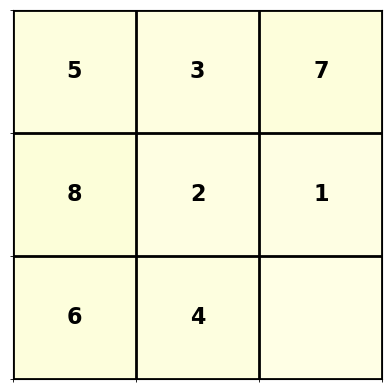

In [41]:
initial_board = [[5, 3, 7], [8, 2, 1], [6, 4, None]]
game = Game( initial_board )
game.show()

In [43]:
game.is_game_win()

False

In [45]:
game.possition_empty_space

[x:2,y:2]

In [47]:
print( "can move-up? ", game.is_allowed_move_up() )
print( "can move-down? ", game.is_allowed_move_down() )
print( "can move-left? ", game.is_allowed_move_left() )
print( "can move-right? ", game.is_allowed_move_right() )

can move-up?  True
can move-down?  False
can move-left?  True
can move-right?  False


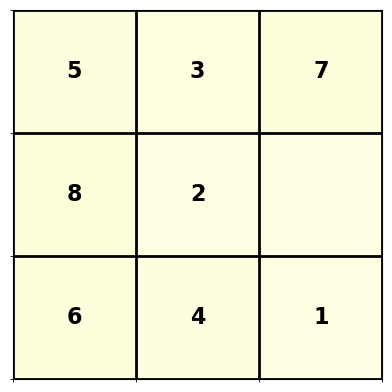

In [49]:
game.move_up()
game.show()

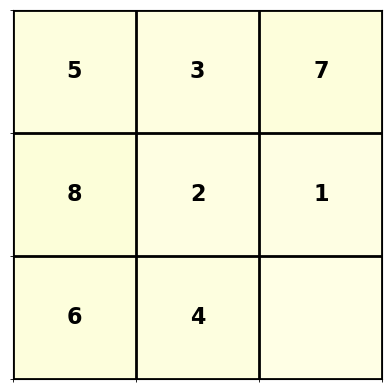

In [51]:
game.move_down()
game.show()

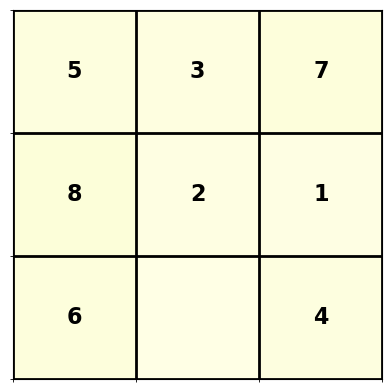

In [53]:
game.move_left()
game.show()

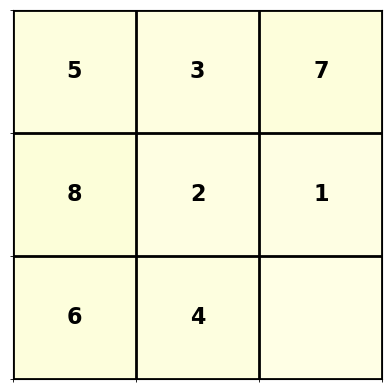

In [55]:
game.move_right()
game.show()

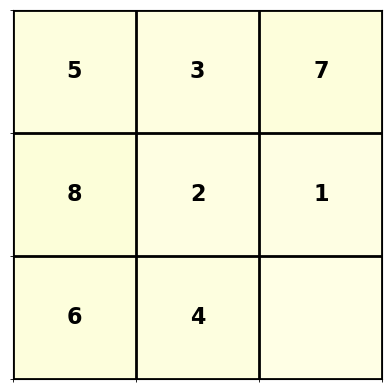

can move-up?  True
can move-down?  False
can move-left?  True
can move-right?  False


In [57]:
game.show()
print( "can move-up? ", game.is_allowed_move_up() )
print( "can move-down? ", game.is_allowed_move_down() )
print( "can move-left? ", game.is_allowed_move_left() )
print( "can move-right? ", game.is_allowed_move_right() )

In [59]:
moves = game.next_allowed_moves()
print("next_nodes: ",len(moves))

next_nodes:  2


In [61]:
for move in moves:
    print( "None: ", move )

None:  [move: UP, stage: [[5, 3, 7], [8, 2, None], [6, 4, 1]], deep: None]
None:  [move: LEFT, stage: [[5, 3, 7], [8, 2, 1], [6, None, 4]], deep: None]
